### This file cleans restructured_dataset_v2.pkl by doing the following operations
* Remove papers with no labels
* Remove papers with no features
* Remove edges for the above mentioned removed papers
* Remove isolated papers which have no incomming or outgoing edge

The new file is stored in **data/cleaned_dataset.pkl**

At the end of this file you can see some statistical results that might be intersting and might help us learn the parameters for CRF

# Parameters

In [1]:
data_path = "./data/"

# Imports

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Processing

## Read the data

In [3]:
with open(data_path+'restructured_dataset_v2.pkl', 'rb') as f:
    data = pickle.load(f)

In [4]:
data.keys()

dict_keys(['postscript_for_id', 'label_for_id', 'edges', 'features_for_id'])

In [5]:
print(len(data['postscript_for_id']))
print(len(data['label_for_id']))
print(len(data['edges']))
print(len(data['features_for_id']))

36954
36954
35788
19396


## Get ids with label and id with features

In [6]:
id_with_label = [x for x in data['label_for_id'].keys() if data['label_for_id'][x]!='NOLABEL']

In [7]:
id_with_features = data['features_for_id'].keys()

## Only keep entries with labels and features

In [8]:
label_for_id = {i:data['label_for_id'][i].split('/')[1] for i in data['label_for_id'].keys() if i in id_with_label and i in id_with_features}

In [9]:
edges = {i:data['edges'][i] for i in data['edges'].keys() if i in id_with_label and i in id_with_features}

In [10]:
features_for_id = {i:data['features_for_id'][i] for i in data['edges'].keys() if i in id_with_label and i in id_with_features}

In [11]:
postscript_for_id = {i:data['postscript_for_id'][i] for i in data['edges'].keys() if i in id_with_label and i in id_with_features}

To make everything same length add empty list to edges for ids with no edges

In [12]:
pids = label_for_id.keys()

In [13]:
for pid in pids:
    if pid not in edges:
        edges[pid] = []

## Iterate through the edges for each pid and remove edges for which we don't have label

In [14]:
for pid in edges:
    edges[pid] = [x for x in edges[pid] if x in pids]

## Remove all the isolated papers. i.e not pointing to any node and not pointed by any node

In [15]:
dead_end_pids = []
for pid in edges.keys():
    if not edges[pid]:
        dead_end_pids.append(pid)

In [16]:
len(dead_end_pids)

2251

In [17]:
cited_pids = set()
for pid in edges.keys():
    for cited in edges[pid]:
        cited_pids.add(pid)

In [18]:
isolated_pids = []
for pid in dead_end_pids:
    if pid not in cited_pids:
        isolated_pids.append(pid)

Turns out all the dead_end_pids are not cited by anyone so we can just remove entries for them. Now we remove the isolated papers

In [19]:
output_dataset = {}
output_dataset["label_for_id"] = {i:label_for_id[i] for i in label_for_id.keys() if i not in isolated_pids}
output_dataset["edges"] = {i:edges[i] for i in edges.keys() if i not in isolated_pids}
output_dataset["features_for_id"] = {i:features_for_id[i] for i in features_for_id.keys() if i not in isolated_pids}
output_dataset["postscript_for_id"] = {i:postscript_for_id[i] for i in postscript_for_id.keys() if i not in isolated_pids}

## Write to pickle

In [20]:
pickle.dump(output_dataset, open(data_path + 'cleaned_dataset.pkl', 'wb'))

## Understanding the data

In [21]:
print(len(output_dataset['postscript_for_id']))
print(len(output_dataset['label_for_id']))
print(len(output_dataset['edges']))
print(len(output_dataset['features_for_id']))

13395
13395
13395
13395


In [22]:
print(output_dataset['postscript_for_id'][18])
print(output_dataset['label_for_id'][18])
print(output_dataset['edges'][18])
print(output_dataset['features_for_id'][18])

['ftp:##ftp.cs.purdue.edu#pub#hosking#papers#oopsla93.ps.gz', 'ftp:##ftp.cs.umass.edu#pub#osl#papers#oopsla93.ps.Z', 'http:##cobar.cs.umass.edu#pubfiles#ds7.ps.gz']
Databases
[52930, 52931, 52932, 743, 7957, 25, 26]
['author0=hosking', 'author1=moss', 'author2=missing', 'title0=object', 'title1=fault', 'title2=handling', 'title3=persistent', 'title4=programming', 'title5=languages', 'title6=performance', 'title7=evaluation', 'publisher=missing', 'address=missing', 'year=1993']


In [23]:
classes_count = {}
for pid in output_dataset['label_for_id']:
    if output_dataset['label_for_id'][pid] not in classes_count:
        classes_count[output_dataset['label_for_id'][pid]] = 0
    classes_count[output_dataset['label_for_id'][pid]] += 1

<BarContainer object of 10 artists>

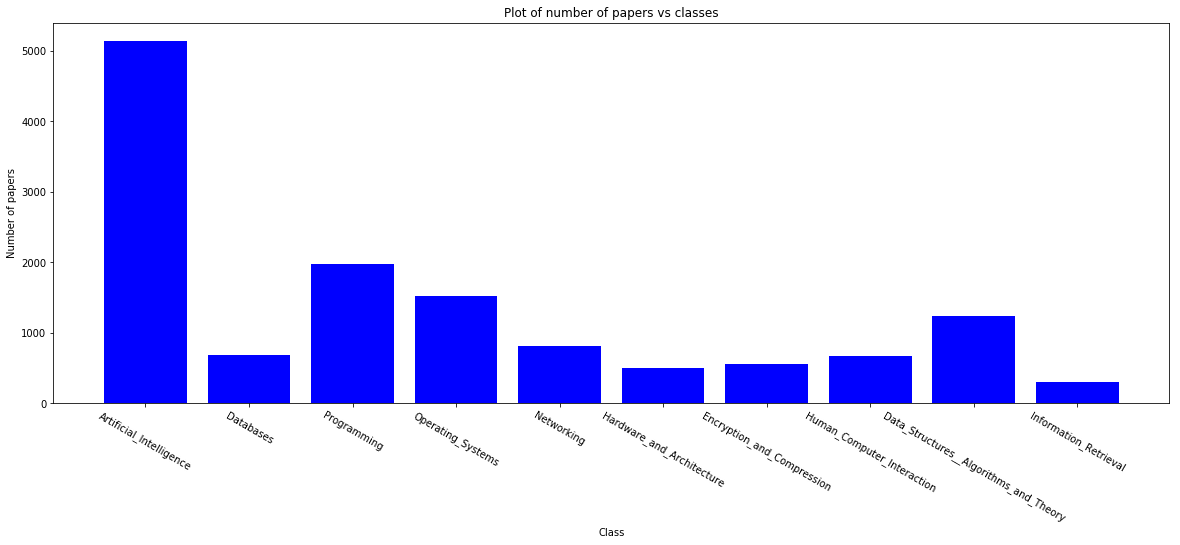

In [24]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=-30)
plt.title("Plot of number of papers vs classes")
plt.xlabel("Class")
plt.ylabel("Number of papers")
plt.bar(classes_count.keys(), classes_count.values(), width=0.8, color='b')

In [25]:
edges_count = {}
for pid in output_dataset['edges']:
    if len(output_dataset['edges'][pid]) not in edges_count:
        edges_count[len(output_dataset['edges'][pid])] = 0
    edges_count[len(output_dataset['edges'][pid])] += 1

<BarContainer object of 51 artists>

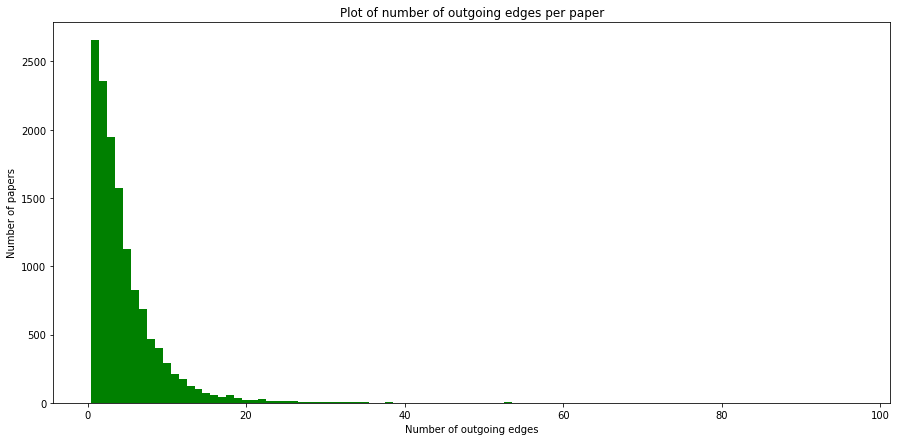

In [26]:
plt.figure(figsize=(15,7))
plt.title("Plot of number of outgoing edges per paper")
plt.xlabel("Number of outgoing edges")
plt.ylabel("Number of papers")
plt.bar(edges_count.keys(), edges_count.values(), width=1, color='g')